# Install Module

# Data Aquisition

In [102]:
import math, os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import preprocessing
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow import feature_column
from sklearn.model_selection import train_test_split

%matplotlib inline

In [103]:
# !gdown 1sExNkoKtz6mV_jKsdqYD7w_7gaaPIGcq
# !gdown 1207dlMWYiacSwEf_OgqoigCPqFRSTQYf

In [104]:
dfTrain = pd.read_csv("./TrainingID.csv")
dfTest = pd.read_csv("./TestingID.csv")

In [105]:
dfTrain.head()

,gatal,ruam kulit,erupsi kulit nodal,bersin terus menerus,gemetaran,panas dingin,nyeri sendi,sakit perut,keasaman,bisul di lidah,...,berteriak-teriak,pengelupasan kulit,perak seperti debu,penyok kecil di kuku,kuku inflamasi,lepuh,sakit merah di sekitar hidung,kerak kuning keluar,prognosa,Tanpa nama: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infeksi jamur,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infeksi jamur,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infeksi jamur,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infeksi jamur,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infeksi jamur,NaN


In [106]:
dfTest.head()

,gatal,ruam kulit,erupsi kulit nodal,bersin terus menerus,gemetaran,panas dingin,nyeri sendi,sakit perut,keasaman,bisul di lidah,...,komedo,berteriak-teriak,pengelupasan kulit,perak seperti debu,penyok kecil di kuku,kuku inflamasi,lepuh,sakit merah di sekitar hidung,kerak kuning keluar,prognosa
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alergi
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,kolestasis kronis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Reaksi Obat


# Pre-Processing Data

## Fix Cell Format

In [107]:
def show_columns(df):
  data = []
  for i in df.columns:
    data.append(i)
  print(data)

In [108]:
print(f"Before Fixxing : ")
show_columns(dfTrain)
show_columns(dfTest)

# Menghapus spasi diawal dan diakhir nama
dfTrain.columns = dfTrain.columns.str.replace('^ +| +$', '', regex=True)
dfTest.columns = dfTest.columns.str.replace('^ +| +$', '', regex=True)

# Mengubah spasi di tengah nama menjadi _
dfTrain.columns = dfTrain.columns.str.replace(' ', '_', regex=True)
dfTest.columns = dfTest.columns.str.replace(' ', '_', regex=True)

# Mengubah - pada kolom menjadi _
dfTrain.columns = dfTrain.columns.str.replace('-', '_')
dfTest.columns = dfTest.columns.str.replace('-', '_')

# Mengubah . pada kolom menjadi _
dfTrain.columns = dfTrain.columns.str.replace('.', '_', regex=True)
dfTest.columns = dfTest.columns.str.replace('.', '_', regex=True)

print(f"\nAfter Fixxing : ")
show_columns(dfTrain)
show_columns(dfTest)

Before Fixxing : 
['gatal', ' ruam kulit', ' erupsi kulit nodal', ' bersin terus menerus', ' gemetaran', ' panas dingin', ' nyeri sendi', ' sakit perut', ' keasaman', ' bisul di lidah', ' pemborosan otot', ' muntah', ' buang air kecil yang terbakar', ' buang air kecil bercak', ' kelelahan', ' penambahan berat badan', ' kecemasan', ' tangan dan kaki dingin', ' perubahan suasana hati', ' penurunan berat badan', ' kegelisahan', ' kelesuan', ' bercak di tenggorokan', ' kadar gula tidak teratur', ' batuk', ' demam tinggi', ' mata cekung', ' sesak napas', ' berkeringat', ' dehidrasi', ' gangguan pencernaan', ' sakit kepala', ' kulit kekuningan', ' urin gelap', ' mual', ' kehilangan selera makan', ' nyeri di belakang mata', ' sakit punggung', ' sembelit', ' sakit perut.1', ' diare', ' demam ringan', ' urin kuning', ' menguningnya mata', ' gagal hati akut', ' kelebihan cairan', ' pembengkakan perut', ' kelenjar getah bening membengkak', ' rasa tidak enak', ' penglihatan kabur dan terdistorsi',

In [109]:
# Menghapus spasi diawal dan diakhir fitur "prognosa"
dfTrain.prognosa = dfTrain.prognosa.str.replace('^ +| +$', '', regex=True)
dfTest.prognosa = dfTest.prognosa.str.replace('^ +| +$', '', regex=True)


## Drop Unecessary Column

In [110]:
dfTrain = dfTrain.drop(['Tanpa_nama:_133'], axis=1)
dfTrain.head()

,gatal,ruam_kulit,erupsi_kulit_nodal,bersin_terus_menerus,gemetaran,panas_dingin,nyeri_sendi,sakit_perut,keasaman,bisul_di_lidah,...,komedo,berteriak_teriak,pengelupasan_kulit,perak_seperti_debu,penyok_kecil_di_kuku,kuku_inflamasi,lepuh,sakit_merah_di_sekitar_hidung,kerak_kuning_keluar,prognosa
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur


In [111]:
for nama_kolom in dfTrain.columns:
  print(dfTrain[nama_kolom].value_counts(), "\n")

0    4242
1     678
Name: gatal, dtype: int64 

0    4134
1     786
Name: ruam_kulit, dtype: int64 

0    4812
1     108
Name: erupsi_kulit_nodal, dtype: int64 

0    4698
1     222
Name: bersin_terus_menerus, dtype: int64 

0    4812
1     108
Name: gemetaran, dtype: int64 

0    4122
1     798
Name: panas_dingin, dtype: int64 

0    4236
1     684
Name: nyeri_sendi, dtype: int64 

0    4698
1     222
Name: sakit_perut, dtype: int64 

0    4698
1     222
Name: keasaman, dtype: int64 

0    4812
1     108
Name: bisul_di_lidah, dtype: int64 

0    4812
1     108
Name: pemborosan_otot, dtype: int64 

0    3006
1    1914
Name: muntah, dtype: int64 

0    4704
1     216
Name: buang_air_kecil_yang_terbakar, dtype: int64 

0    4812
1     108
Name: buang_air_kecil_bercak, dtype: int64 

0    2988
1    1932
Name: kelelahan, dtype: int64 

0    4806
1     114
Name: penambahan_berat_badan, dtype: int64 

0    4806
1     114
Name: kecemasan, dtype: int64 

0    4806
1     114
Name: tangan_dan_ka

In [112]:
for nama_kolom in dfTest.columns:
  print(dfTest[nama_kolom].value_counts(), "\n")

0    35
1     7
Name: gatal, dtype: int64 

0    34
1     8
Name: ruam_kulit, dtype: int64 

0    41
1     1
Name: erupsi_kulit_nodal, dtype: int64 

0    40
1     2
Name: bersin_terus_menerus, dtype: int64 

0    41
1     1
Name: gemetaran, dtype: int64 

0    35
1     7
Name: panas_dingin, dtype: int64 

0    36
1     6
Name: nyeri_sendi, dtype: int64 

0    40
1     2
Name: sakit_perut, dtype: int64 

0    40
1     2
Name: keasaman, dtype: int64 

0    41
1     1
Name: bisul_di_lidah, dtype: int64 

0    41
1     1
Name: pemborosan_otot, dtype: int64 

0    25
1    17
Name: muntah, dtype: int64 

0    40
1     2
Name: buang_air_kecil_yang_terbakar, dtype: int64 

0    41
1     1
Name: buang_air_kecil_bercak, dtype: int64 

0    25
1    17
Name: kelelahan, dtype: int64 

0    41
1     1
Name: penambahan_berat_badan, dtype: int64 

0    41
1     1
Name: kecemasan, dtype: int64 

0    41
1     1
Name: tangan_dan_kaki_dingin, dtype: int64 

0    40
1     2
Name: perubahan_suasana_hati, 

## Exploratory Data Analysis (EDA)

In [113]:
len((dfTrain['prognosa']).unique())

41

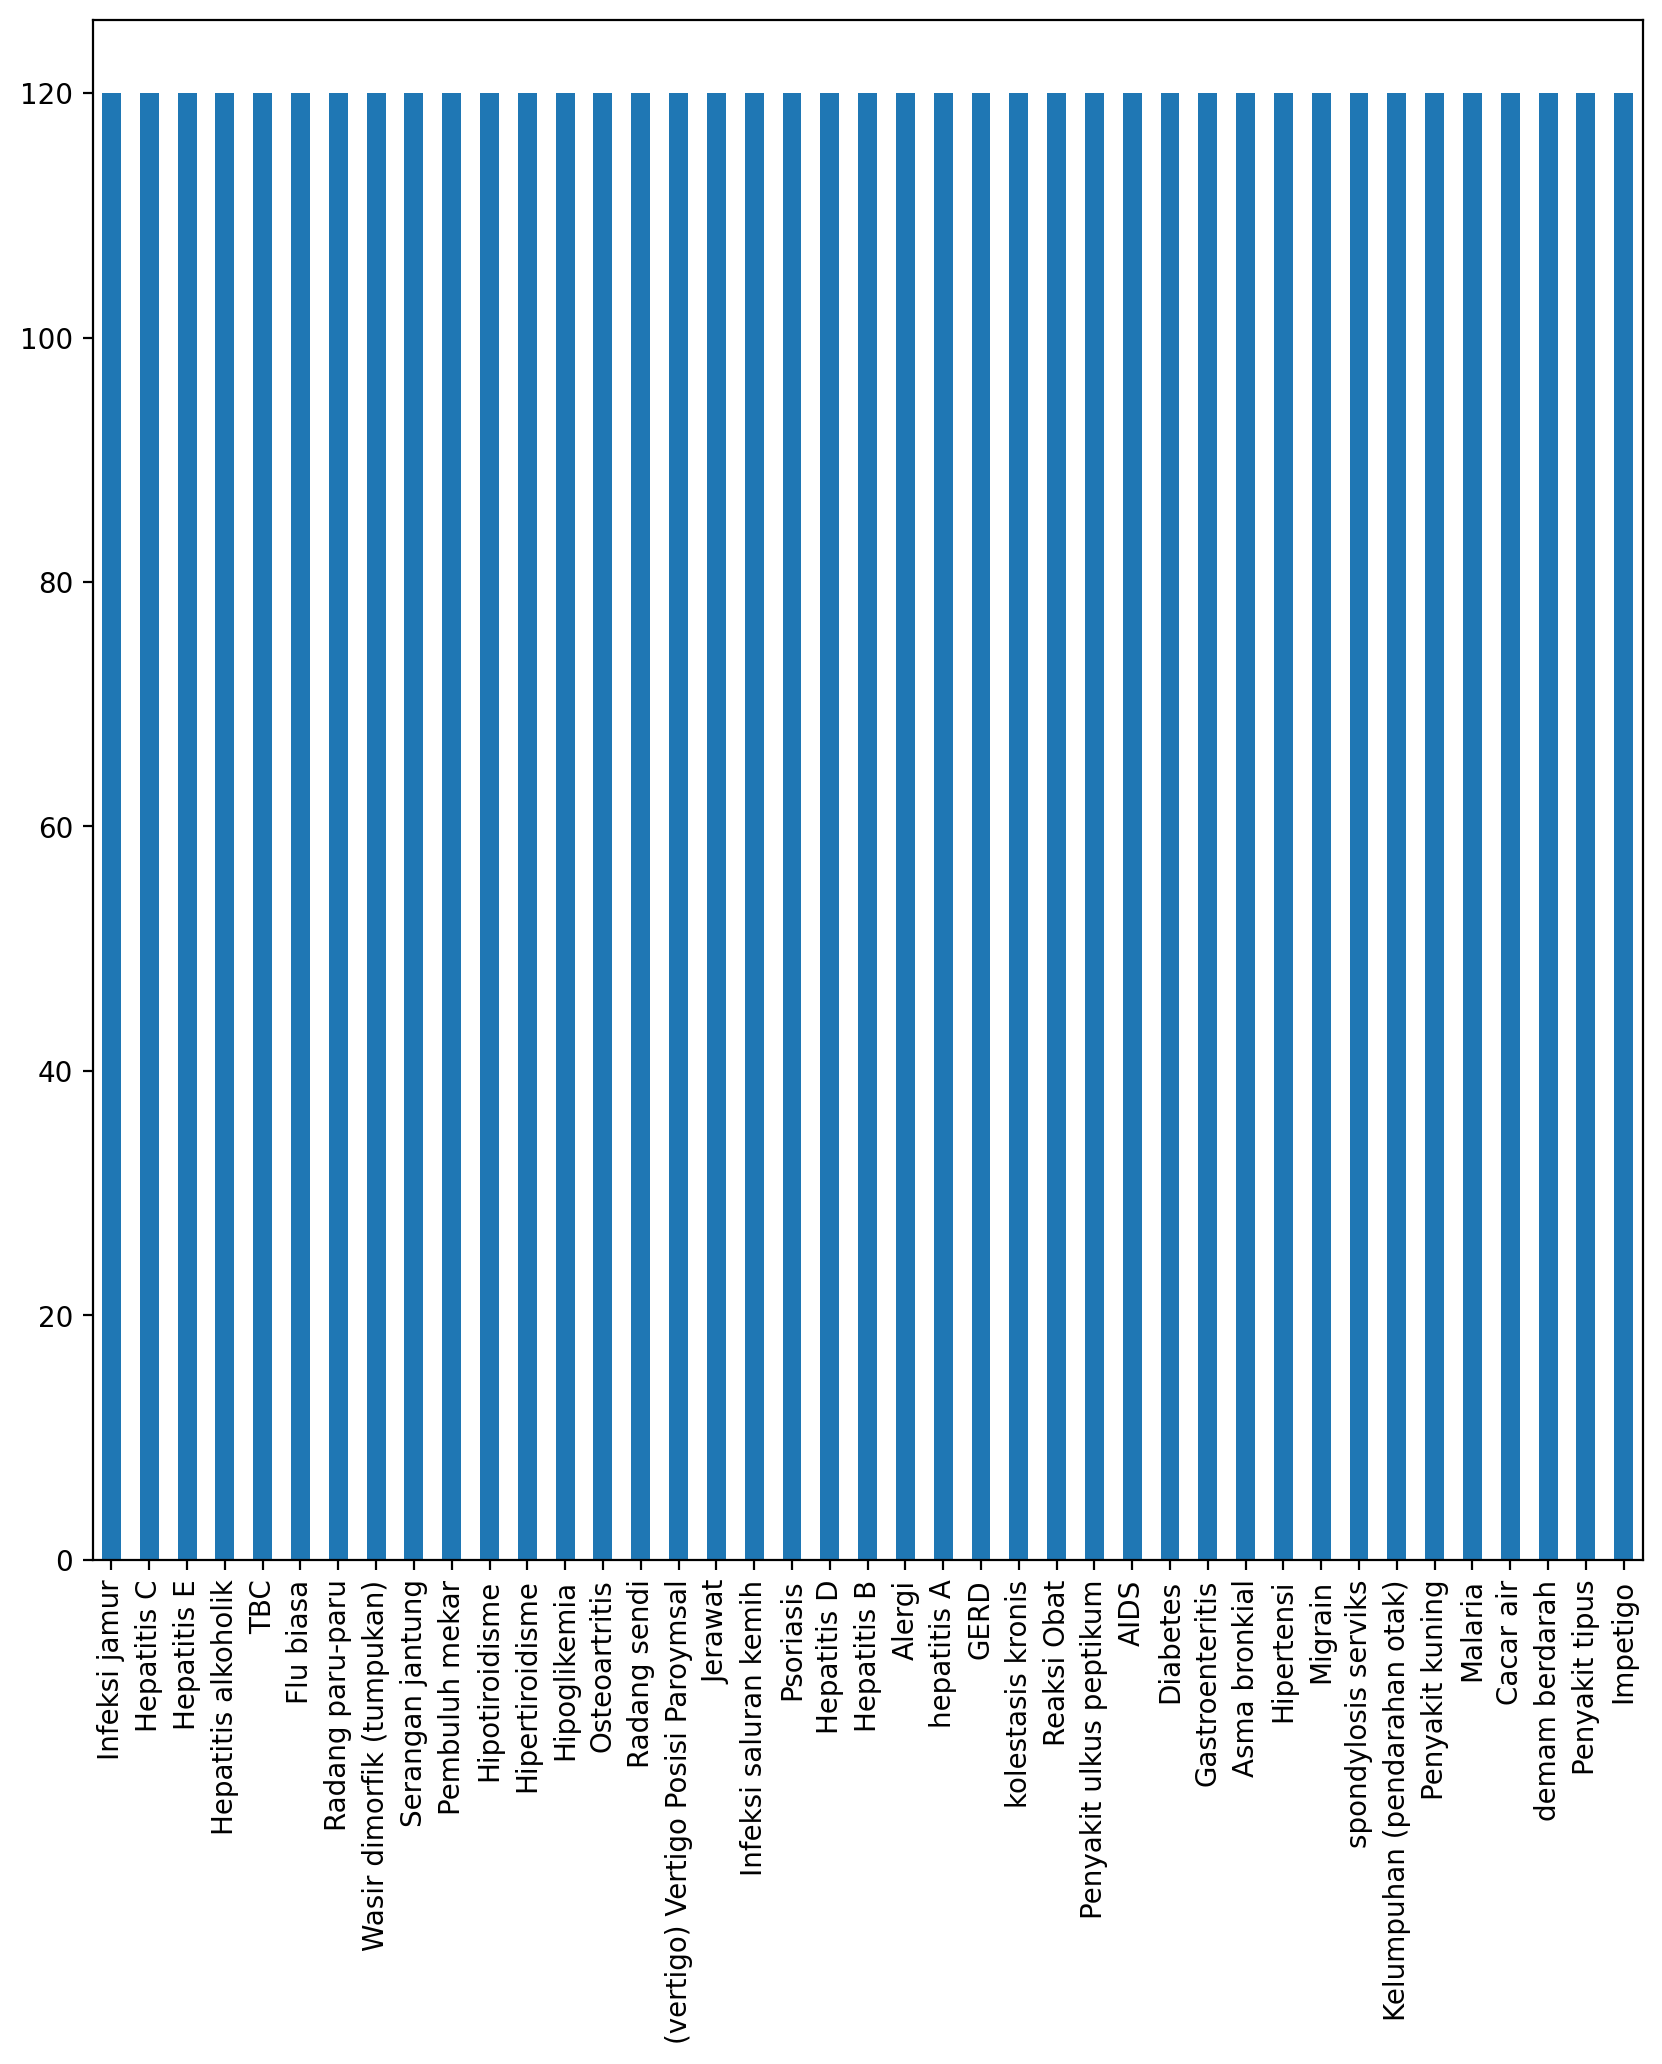

In [114]:
p = dfTrain['prognosa'].value_counts().plot(kind="bar") 

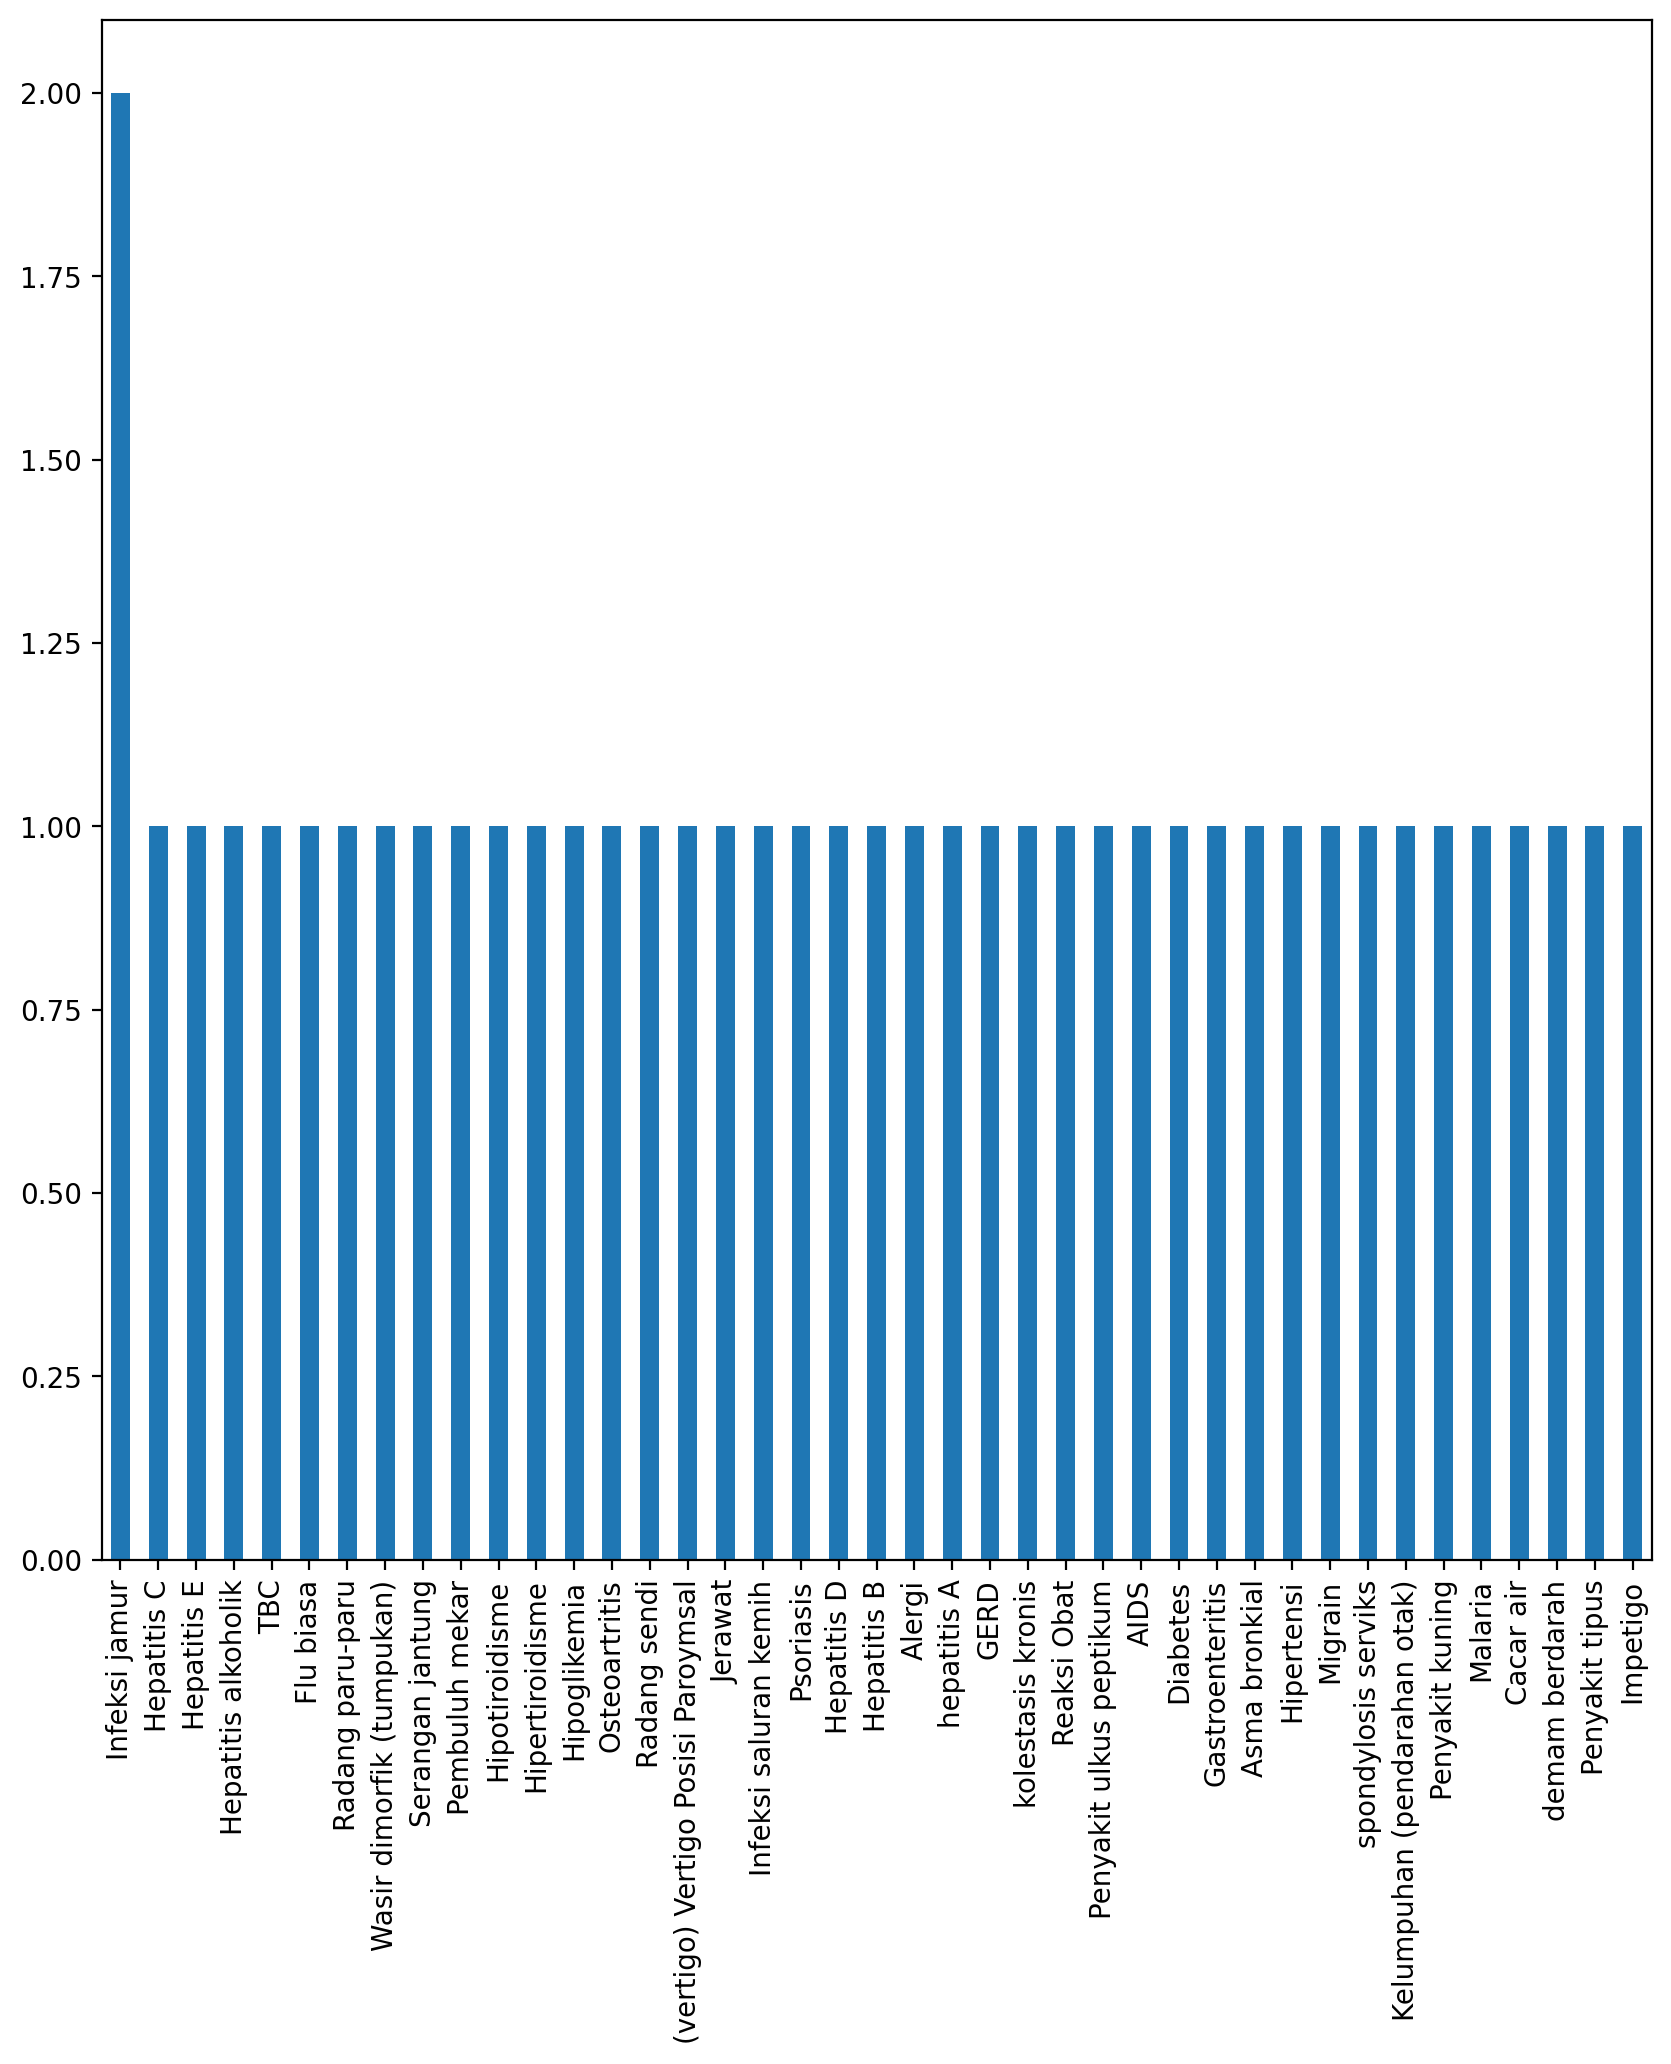

In [115]:
p = dfTest['prognosa'].value_counts().plot(kind="bar") 

In [116]:
dfTrain.isna().sum()

gatal                            0
ruam_kulit                       0
erupsi_kulit_nodal               0
bersin_terus_menerus             0
gemetaran                        0
                                ..
kuku_inflamasi                   0
lepuh                            0
sakit_merah_di_sekitar_hidung    0
kerak_kuning_keluar              0
prognosa                         0
Length: 133, dtype: int64

In [117]:
dfTest.isna().sum()

gatal                            0
ruam_kulit                       0
erupsi_kulit_nodal               0
bersin_terus_menerus             0
gemetaran                        0
                                ..
kuku_inflamasi                   0
lepuh                            0
sakit_merah_di_sekitar_hidung    0
kerak_kuning_keluar              0
prognosa                         0
Length: 133, dtype: int64

## Label Encoding

In [118]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [119]:
dfTrain["prognosa"] = labelencoder.fit_transform(dfTrain["prognosa"])

for i in dfTrain["prognosa"].unique():
  print(i, ":", labelencoder.inverse_transform([i]))

19 : ['Infeksi jamur']
2 : ['Alergi']
7 : ['GERD']
39 : ['kolestasis kronis']
33 : ['Reaksi Obat']
29 : ['Penyakit ulkus peptikum']
1 : ['AIDS']
5 : ['Diabetes']
8 : ['Gastroenteritis']
3 : ['Asma bronkial']
14 : ['Hipertensi']
24 : ['Migrain']
40 : ['spondylosis serviks']
22 : ['Kelumpuhan (pendarahan otak)']
27 : ['Penyakit kuning']
23 : ['Malaria']
4 : ['Cacar air']
37 : ['demam berdarah']
28 : ['Penyakit tipus']
38 : ['hepatitis A']
9 : ['Hepatitis B']
10 : ['Hepatitis C']
11 : ['Hepatitis D']
12 : ['Hepatitis E']
13 : ['Hepatitis alkoholik']
35 : ['TBC']
6 : ['Flu biasa']
31 : ['Radang paru-paru']
36 : ['Wasir dimorfik (tumpukan)']
34 : ['Serangan jantung']
26 : ['Pembuluh mekar']
17 : ['Hipotiroidisme']
15 : ['Hipertiroidisme']
16 : ['Hipoglikemia']
25 : ['Osteoartritis']
32 : ['Radang sendi']
0 : ['(vertigo) Vertigo Posisi Paroymsal']
21 : ['Jerawat']
20 : ['Infeksi saluran kemih']
30 : ['Psoriasis']
18 : ['Impetigo']


In [120]:
dfTest["prognosa"] = labelencoder.fit_transform(dfTest["prognosa"])

for i in dfTest["prognosa"].unique():
  print(i, ":", labelencoder.inverse_transform([i]))

19 : ['Infeksi jamur']
2 : ['Alergi']
7 : ['GERD']
39 : ['kolestasis kronis']
33 : ['Reaksi Obat']
29 : ['Penyakit ulkus peptikum']
1 : ['AIDS']
5 : ['Diabetes']
8 : ['Gastroenteritis']
3 : ['Asma bronkial']
14 : ['Hipertensi']
24 : ['Migrain']
40 : ['spondylosis serviks']
22 : ['Kelumpuhan (pendarahan otak)']
27 : ['Penyakit kuning']
23 : ['Malaria']
4 : ['Cacar air']
37 : ['demam berdarah']
28 : ['Penyakit tipus']
38 : ['hepatitis A']
9 : ['Hepatitis B']
10 : ['Hepatitis C']
11 : ['Hepatitis D']
12 : ['Hepatitis E']
13 : ['Hepatitis alkoholik']
35 : ['TBC']
6 : ['Flu biasa']
31 : ['Radang paru-paru']
36 : ['Wasir dimorfik (tumpukan)']
34 : ['Serangan jantung']
26 : ['Pembuluh mekar']
17 : ['Hipotiroidisme']
15 : ['Hipertiroidisme']
16 : ['Hipoglikemia']
25 : ['Osteoartritis']
32 : ['Radang sendi']
0 : ['(vertigo) Vertigo Posisi Paroymsal']
21 : ['Jerawat']
20 : ['Infeksi saluran kemih']
30 : ['Psoriasis']
18 : ['Impetigo']


## Save Data Clean

In [121]:
dfTrain.to_csv('data_train_clean.csv', index = False, header = True,index_label=None)
dfTest.to_csv('data_test_clean.csv', index = False, header = True,index_label=None)

# Splitting Dataset

In [122]:
X_train = dfTrain.drop(['prognosa'], axis=1)
y_train = dfTrain['prognosa']

In [123]:
X_test = dfTest.drop(['prognosa'], axis=1)
y_test = dfTest['prognosa']

In [124]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4920, 132) (4920,) (42, 132) (42,)


# Build and Training Model

In [125]:
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.01,
    patience=10,
    verbose=0,
    mode='min',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0
)

In [126]:
from tensorflow.keras.optimizers import SGD

model = tf.keras.models.Sequential([
    Flatten(input_shape=[132]),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(41, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

In [127]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 132)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               17024     
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 41)                1353      
                                                                 
Total params: 28,713
Trainable params: 28,713
Non-trai

In [128]:
history = model.fit(x=X_train, 
                    y=y_train, 
                    epochs=100,
                    batch_size=8,
                    validation_data=[X_test, y_test],
                    callbacks=[lr_reducer])

Epoch 1/100
615/615 [==============================] - 1s 1ms/step - loss: 3.5516 - accuracy: 0.1370 - val_loss: 3.2649 - val_accuracy: 0.4048 - lr: 0.0100
Epoch 2/100
615/615 [==============================] - 1s 1ms/step - loss: 2.7614 - accuracy: 0.4537 - val_loss: 1.8550 - val_accuracy: 0.8095 - lr: 0.0100
Epoch 3/100
615/615 [==============================] - 1s 1ms/step - loss: 1.3235 - accuracy: 0.7825 - val_loss: 0.4327 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 4/100
615/615 [==============================] - 1s 1ms/step - loss: 0.4960 - accuracy: 0.9348 - val_loss: 0.1007 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 5/100
615/615 [==============================] - 1s 1ms/step - loss: 0.2510 - accuracy: 0.9652 - val_loss: 0.0477 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 6/100
615/615 [==============================] - 1s 1ms/step - loss: 0.1616 - accuracy: 0.9768 - val_loss: 0.0270 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 7/100
615/615 [==============================] - 1s 1ms/st

# Evaluate Model

In [129]:
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(X_test, y_test, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000

loss: 0.0000
accuracy: 1.0000


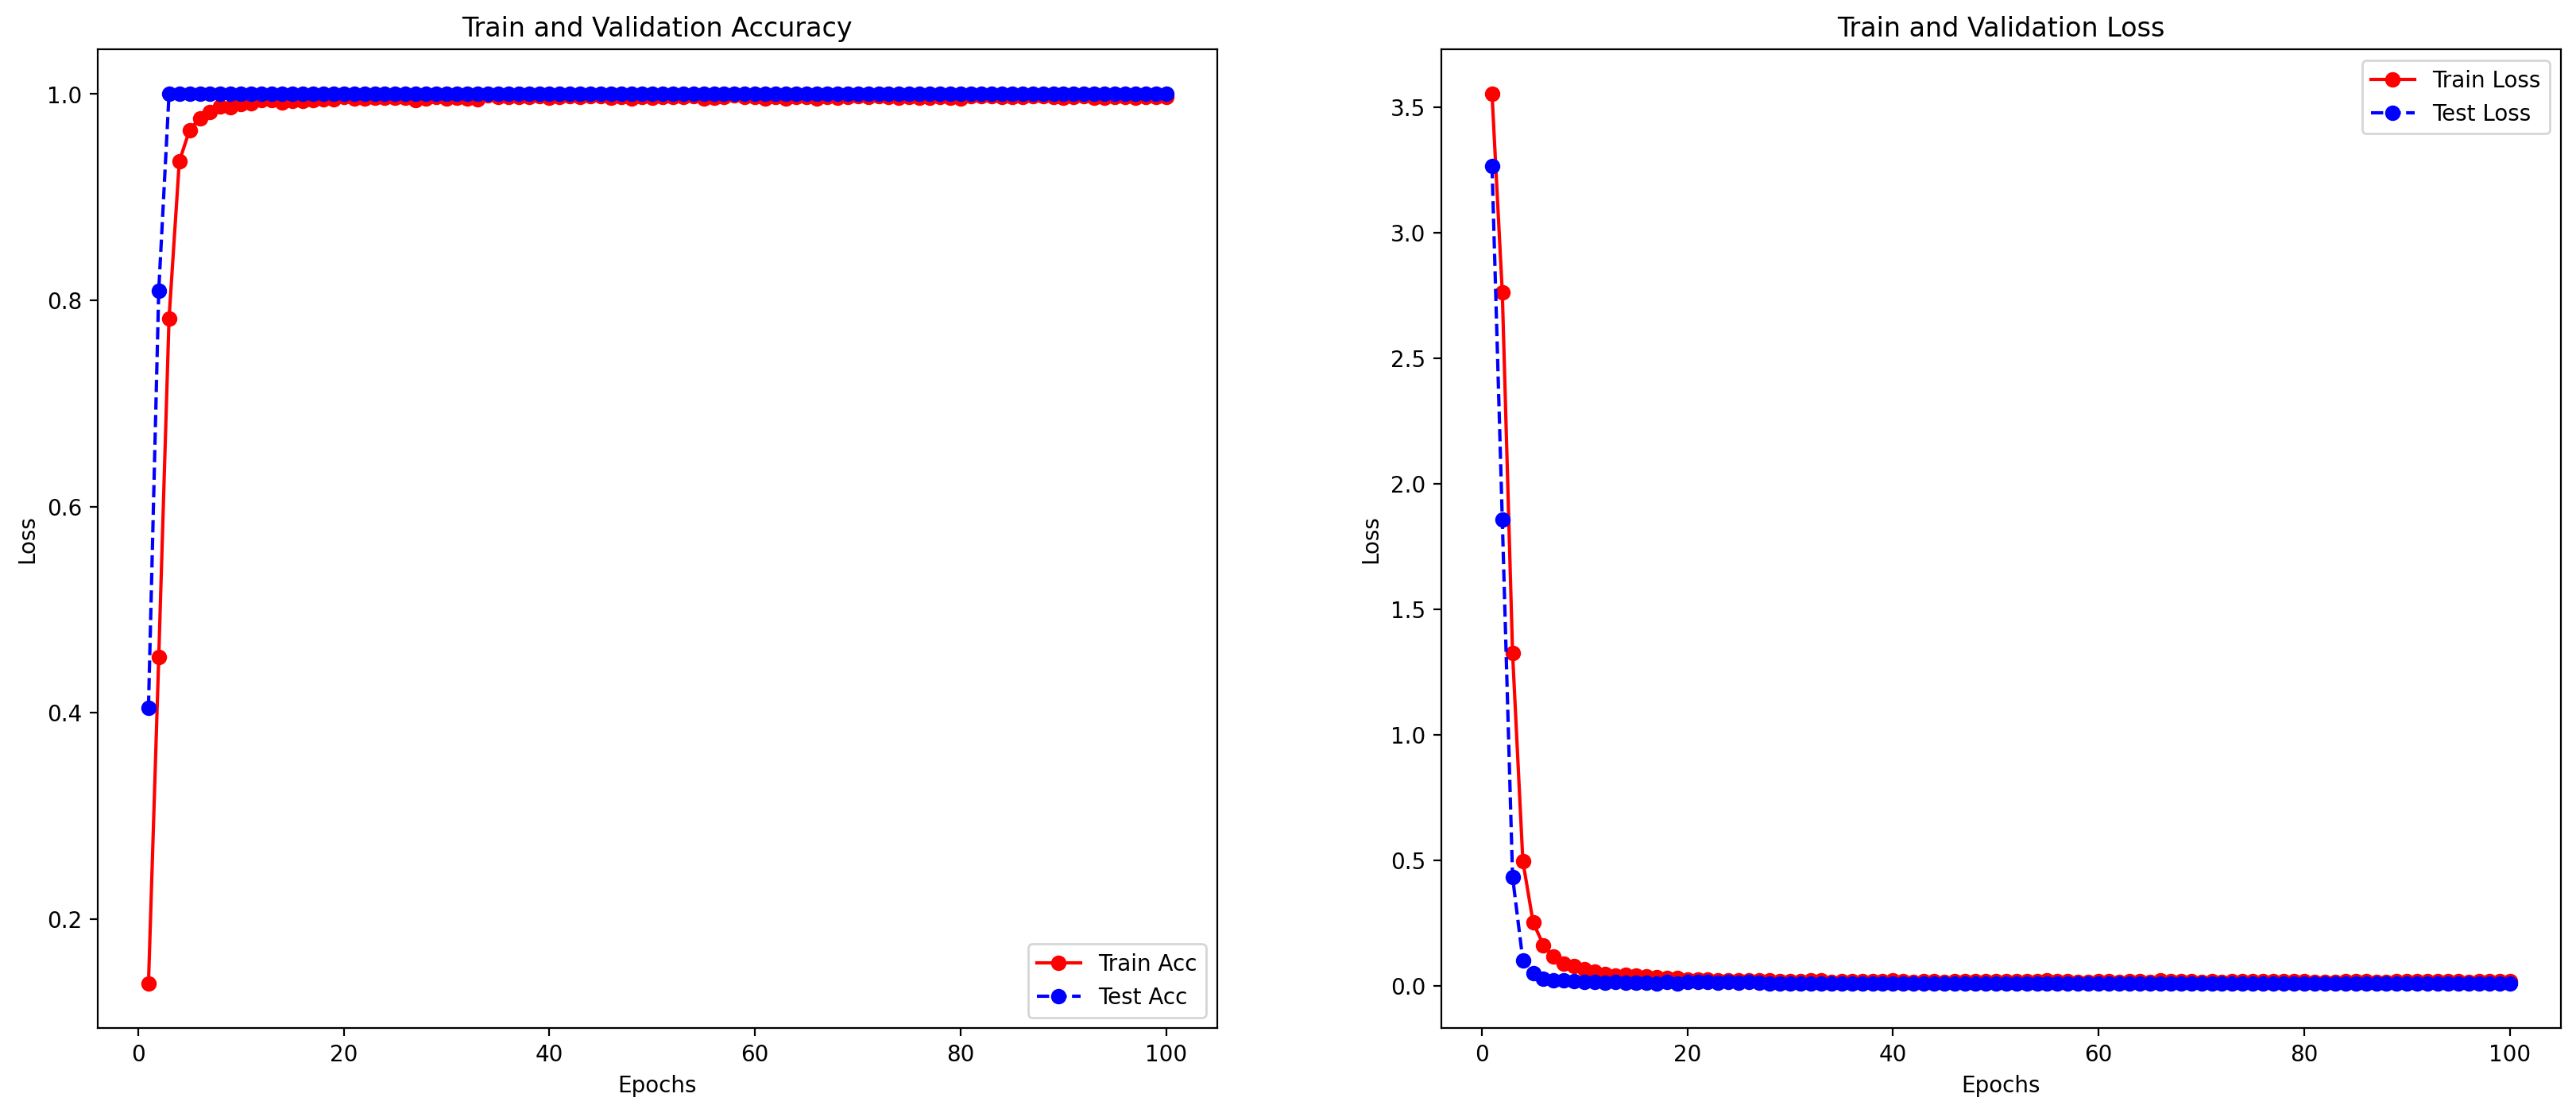

In [130]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs, train_acc, color = 'red', marker = 'o', linestyle = '-', label='Train Acc')
ax[0].plot(epochs, val_acc, color = 'blue', marker = 'o', linestyle = '--', label= 'Test Acc')
ax[0].set_title('Train and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, train_loss, color = 'red', marker = 'o', linestyle = '-', label='Train Loss')
ax[1].plot(epochs, val_loss, color = 'blue', marker = 'o', linestyle = '--', label= 'Test Loss')
ax[1].set_title('Train and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

In [131]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred.argmax(axis=1)))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1

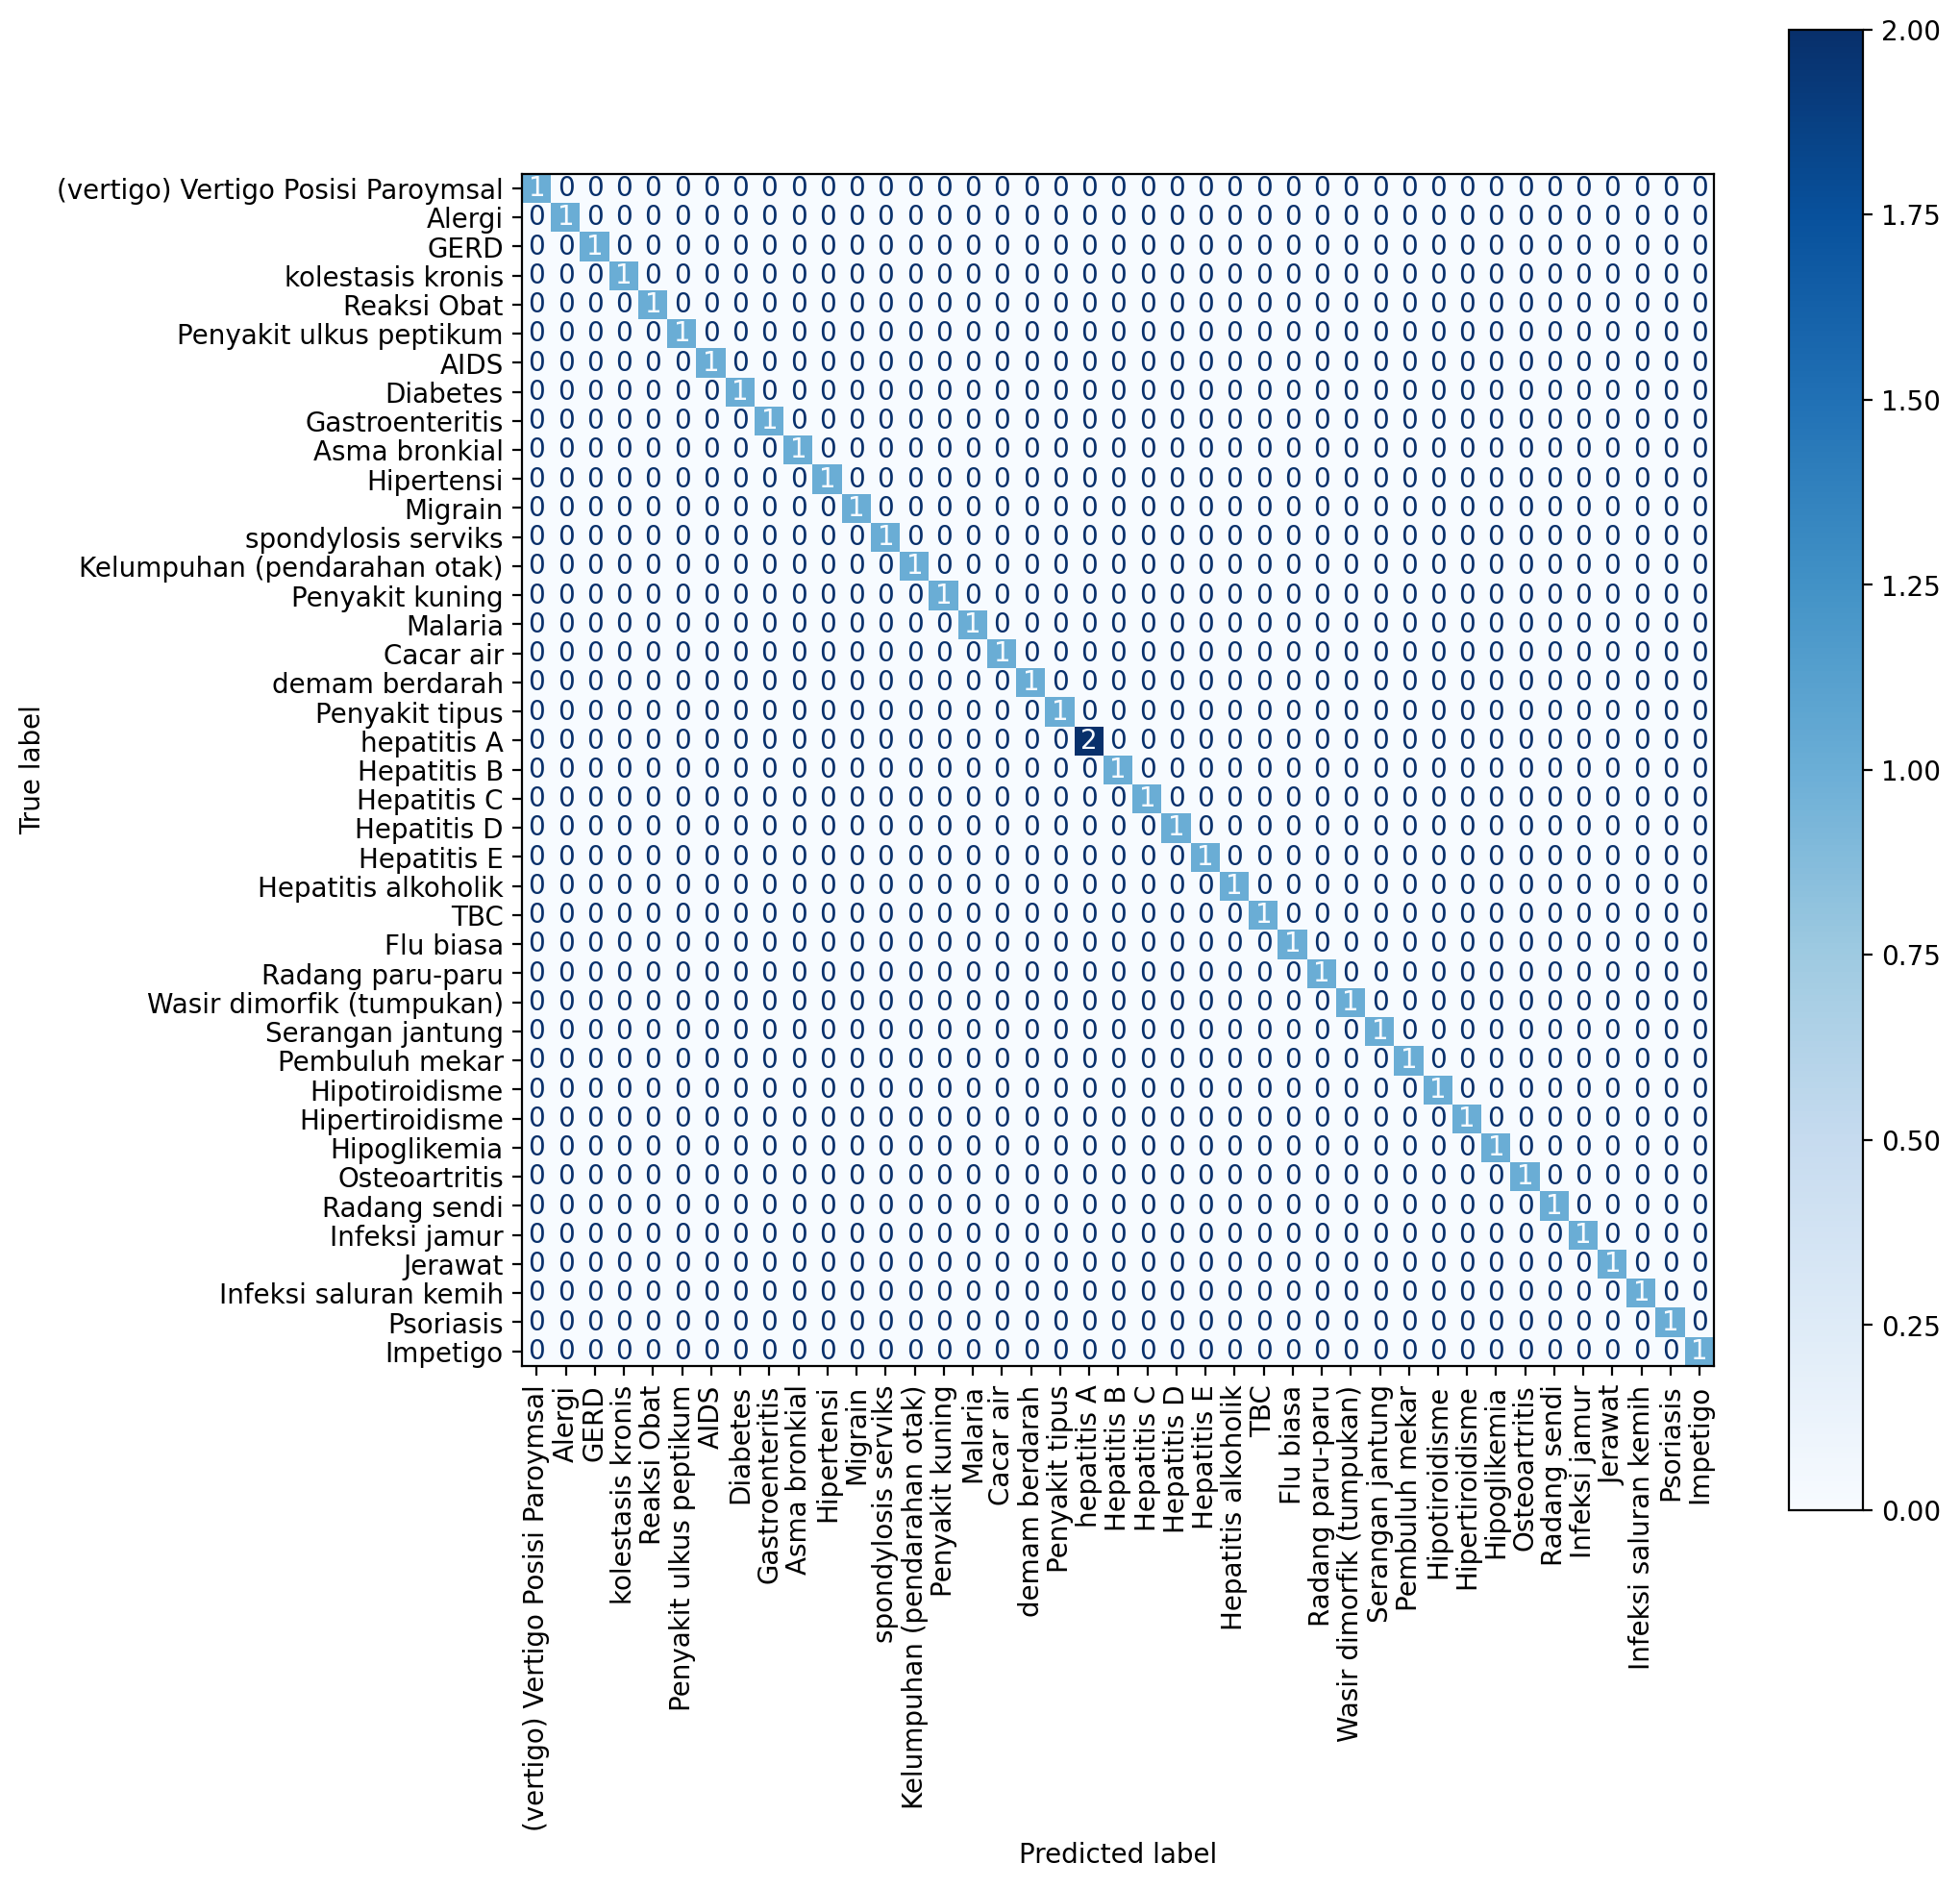

In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%config InlineBackend.figure_format='retina'

confused_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=confused_matrix, display_labels=classes)
disp.plot(cmap="Blues", xticks_rotation='vertical')

# Predict Custom User Input

In [139]:
print(f"Banyak fitur inputan : {len(dfTrain.columns)-1} fitur")
print(f"Banyak kelas : {(y_pred.shape[0]-1)} kelas")

Banyak fitur inputan : 132 fitur
Banyak kelas : 41 kelas


In [140]:
df_custom = pd.DataFrame(data={
    'gatal': [1],
    'ruam_kulit': [1],
    'erupsi_kulit_nodal': [1],
    'bersin_terus_menerus': [0],
    'gemetaran': [0],
    'panas_dingin': [0],
    'nyeri_sendi': [0],
    'sakit_perut': [0],
    'keasaman': [0],
    'bisul_di_lidah': [0],
    'pemborosan_otot': [0],
    'muntah': [0],
    'buang_air_kecil_yang_terbakar': [0],
    'buang_air_kecil_bercak': [0],
    'kelelahan': [0],
    'penambahan_berat_badan': [0],
    'kecemasan': [0],
    'tangan_dan_kaki_dingin': [0],
    'perubahan_suasana_hati': [0],
    'penurunan_berat_badan': [0],
    'kegelisahan': [0],
    'kelesuan': [0],
    'bercak_di_tenggorokan': [0],
    'kadar_gula_tidak_teratur': [0],
    'batuk': [0],
    'demam_tinggi': [0],
    'mata_cekung': [0],
    'sesak_napas': [0],
    'berkeringat': [0],
    'dehidrasi': [0],
    'gangguan_pencernaan': [0],
    'sakit_kepala': [0],
    'kulit_kekuningan': [0],
    'urin_gelap': [0],
    'mual': [0],
    'kehilangan_selera_makan': [0],
    'nyeri_di_belakang_mata': [0],
    'sakit_punggung': [0],
    'sembelit': [0],
    'sakit_perut_1': [0],
    'diare': [0],
    'demam_ringan': [0],
    'urin_kuning': [0], 
    'menguningnya_mata': [0],
    'gagal_hati_akut': [0],
    'kelebihan_cairan': [0],
    'pembengkakan_perut': [0],
    'kelenjar_getah_bening_membengkak': [0],
    'rasa_tidak_enak': [0],
    'penglihatan_kabur_dan_terdistorsi': [0],
    'dahak': [0],
    'iritasi_tenggorokan': [0],
    'mata_merah': [0],
    'tekanan_sinus': [0],
    'pilek': [0],
    'penyumbatan': [0],
    'nyeri_dada': [0],
    'kelemahan_pada_tungkai': [0],
    'detak_jantung_cepat': [0],
    'nyeri_saat_buang_air_besar': [0],
    'nyeri_di_daerah_anus': [0],
    'tinja_berdarah': [0],
    'iritasi_pada_anus': [0],
    'sakit_leher': [0],
    'pusing': [0],
    'kram': [0],
    'memar': [0],
    'kegemukan': [0],
    'kaki_bengkak': [0],
    'pembuluh_darah_membengkak': [0],
    'wajah_dan_mata_sembab': [0],
    'tiroid_yang_membesar': [0],
    'kuku_rapuh': [0],
    'ekstremitas_bengkak': [0],
    'rasa_lapar_yang_berlebihan': [0],
    'kontak_perkawinan_ekstra': [0],
    'bibir_kering_dan_kesemutan': [0],
    'ucapan_cadel': [0],
    'sakit_lutut': [0],
    'nyeri_sendi_panggul': [0],
    'kelemahan_otot': [0],
    'leher_kaku': [0],
    'sendi_bengkak': [0],
    'kekakuan_gerakan': [0],
    'gerakan_berputar': [0],
    'kehilangan_keseimbangan': [0],
    'kegoyangan': [0],
    'kelemahan_satu_sisi_tubuh': [0],
    'kehilangan_bau': [0], 
    'ketidaknyamanan_kandung_kemih': [0],
    'bau_urin_yang_busuk': [0],
    'rasa_urin_terus_menerus': [0],
    'lewatnya_gas': [0],
    'gatal_dalam': [0],
    'tampilan_beracun_atau_tifus': [0],
    'depresi': [0],
    'sifat_lekas_marah': [0],
    'nyeri_otot': [0],
    'sensorium_yang_diubah': [0],
    'bintik_bintik_merah_di_sekujur_tubuh': [0],
    'sakit_perut_2': [0],
    'menstruasi_yang_tidak_normal': [0],
    'patch_diskromik': [1],
    'berair_dari_mata': [0],
    'nafsu_makan_meningkat': [0],
    'poliuria': [0],
    'sejarah_keluarga': [0],
    'dahak_mukoid': [0],
    'dahak_berkarat': [0],
    'kurang_konsenterasi': [0],
    'gangguan_penglihatan': [0],
    'menerima_transfusi_darah': [0],
    'menerima_suntikan_yang_tidak_steril': [0],
    'koma': [0],
    'pendarahan_perut': [0],
    'distensi_abdomen': [0],
    'riwayat_konsumsi_alkohol': [0],
    'kelebihan_cairan_1': [0],
    'darah_dalam_dahak': [0],
    'pembuluh_darah_menonjol_di_betis': [0],
    'palpitasi': [0],
    'berjalan_yang_menyakitkan': [0],
    'jerawat_berisi_nanah': [0],
    'komedo': [0],
    'berteriak_teriak': [0],
    'pengelupasan_kulit': [0],
    'perak_seperti_debu': [0],
    'penyok_kecil_di_kuku': [0],
    'kuku_inflamasi': [0],
    'lepuh': [0],
    'sakit_merah_di_sekitar_hidung': [0],
    'kerak_kuning_keluar': [0]
})
df_custom

,gatal,ruam_kulit,erupsi_kulit_nodal,bersin_terus_menerus,gemetaran,panas_dingin,nyeri_sendi,sakit_perut,keasaman,bisul_di_lidah,...,jerawat_berisi_nanah,komedo,berteriak_teriak,pengelupasan_kulit,perak_seperti_debu,penyok_kecil_di_kuku,kuku_inflamasi,lepuh,sakit_merah_di_sekitar_hidung,kerak_kuning_keluar
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
classes = [
    '(vertigo) Vertigo Posisi Paroymsal', 'Alergi', 'GERD', 'kolestasis kronis', 'Reaksi Obat', 'Penyakit ulkus peptikum',
    'AIDS', 'Diabetes', 'Gastroenteritis', 'Asma bronkial', 'Hipertensi', 'Migrain', 'spondylosis serviks',
    'Kelumpuhan (pendarahan otak)', 'Penyakit kuning', 'Malaria', 'Cacar air', 'demam berdarah', 'Penyakit tipus',
    'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hepatitis alkoholik', 'TBC',
    'Flu biasa', 'Radang paru-paru', 'Wasir dimorfik (tumpukan)', 'Serangan jantung', 'Pembuluh mekar',
    'Hipotiroidisme', 'Hipertiroidisme', 'Hipoglikemia', 'Osteoartritis', 'Radang sendi', 'Infeksi jamur', 'Jerawat',
    'Infeksi saluran kemih', 'Psoriasis', 'Impetigo'
]

result = model.predict(df_custom)
index_predict = np.argmax(result)
print(classes[index_predict], f"dengan probabilitas {round((result[0, index_predict])*100, 2)}%")

1/1 [==============================] - 0s 18ms/step
hepatitis A dengan probabilitas 99.98%


# Save Model

In [142]:
model.save("./save_model_nn")

INFO:tensorflow:Assets written to: ./save_model_nn\assets


In [64]:
# !zip -r save_model.zip "./save_model_nn"

# Testing Load Saved TF Model

In [143]:
loaded_model = tf.keras.models.load_model('save_model_nn')
result = loaded_model.predict(df_custom)
index_predict = np.argmax(result)
print(classes[index_predict], f"dengan probabilitas {round((result[0, index_predict])*100, 2)}%")

1/1 [==============================] - 0s 52ms/step
hepatitis A dengan probabilitas 99.98%


# Convert TF Model to TF Lite

In [144]:
converter = tf.lite.TFLiteConverter.from_saved_model('save_model_nn')

# Set the optimzations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [145]:
# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [147]:
import pathlib
tflite_model_file = pathlib.Path('model_nn.tflite')
tflite_model_file.write_bytes(tflite_model)

32576

# Inference Model

In [148]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [149]:
# Test the TensorFlow Lite model on random input data.
data_x = X_test.to_numpy()
data_y = y_test.to_numpy()
# np.array(np.random.random_sample(input_shape), dtype=np.float32)
# input_shape = input_details[0]['shape']
inputs, outputs, labels = [], [], []
for index in range(len(data_x)-1):
    input_data = np.array(data_x[index].reshape(1, data_x[index].shape[0]), dtype=np.float32)
    # print(input_data)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    # Test the TensorFlow model on random input data.
    constant_data = tf.constant(input_data)
    # print(constant_data)
    tf_results = model(constant_data)
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])
    labels.append(output_data)

In [150]:
for index in range(len(inputs)):
    print(f"Indeks ke-{index}")
    print(f"Input: {inputs[index]}")
    index_predict = np.argmax(labels[index])
    print(f"Output : {classes[index_predict]}, dengan probabilitas {round((labels[index][0][index_predict])*100, 2)}%")
    print(f"True Output: {classes[data_y[index]]}")
    
    print()

Indeks ke-0
Input: 1.0
Output : hepatitis A, dengan probabilitas 99.98%
True Output: hepatitis A

Indeks ke-1
Input: 0.0
Output : GERD, dengan probabilitas 99.98%
True Output: GERD

Indeks ke-2
Input: 0.0
Output : Diabetes, dengan probabilitas 99.99%
True Output: Diabetes

Indeks ke-3
Input: 1.0
Output : Psoriasis, dengan probabilitas 99.99%
True Output: Psoriasis

Indeks ke-4
Input: 1.0
Output : Hipoglikemia, dengan probabilitas 99.99%
True Output: Hipoglikemia

Indeks ke-5
Input: 0.0
Output : Serangan jantung, dengan probabilitas 100.0%
True Output: Serangan jantung

Indeks ke-6
Input: 0.0
Output : Alergi, dengan probabilitas 100.0%
True Output: Alergi

Indeks ke-7
Input: 0.0
Output : Penyakit ulkus peptikum, dengan probabilitas 100.0%
True Output: Penyakit ulkus peptikum

Indeks ke-8
Input: 0.0
Output : Gastroenteritis, dengan probabilitas 99.99%
True Output: Gastroenteritis

Indeks ke-9
Input: 0.0
Output : kolestasis kronis, dengan probabilitas 99.96%
True Output: kolestasis kronis

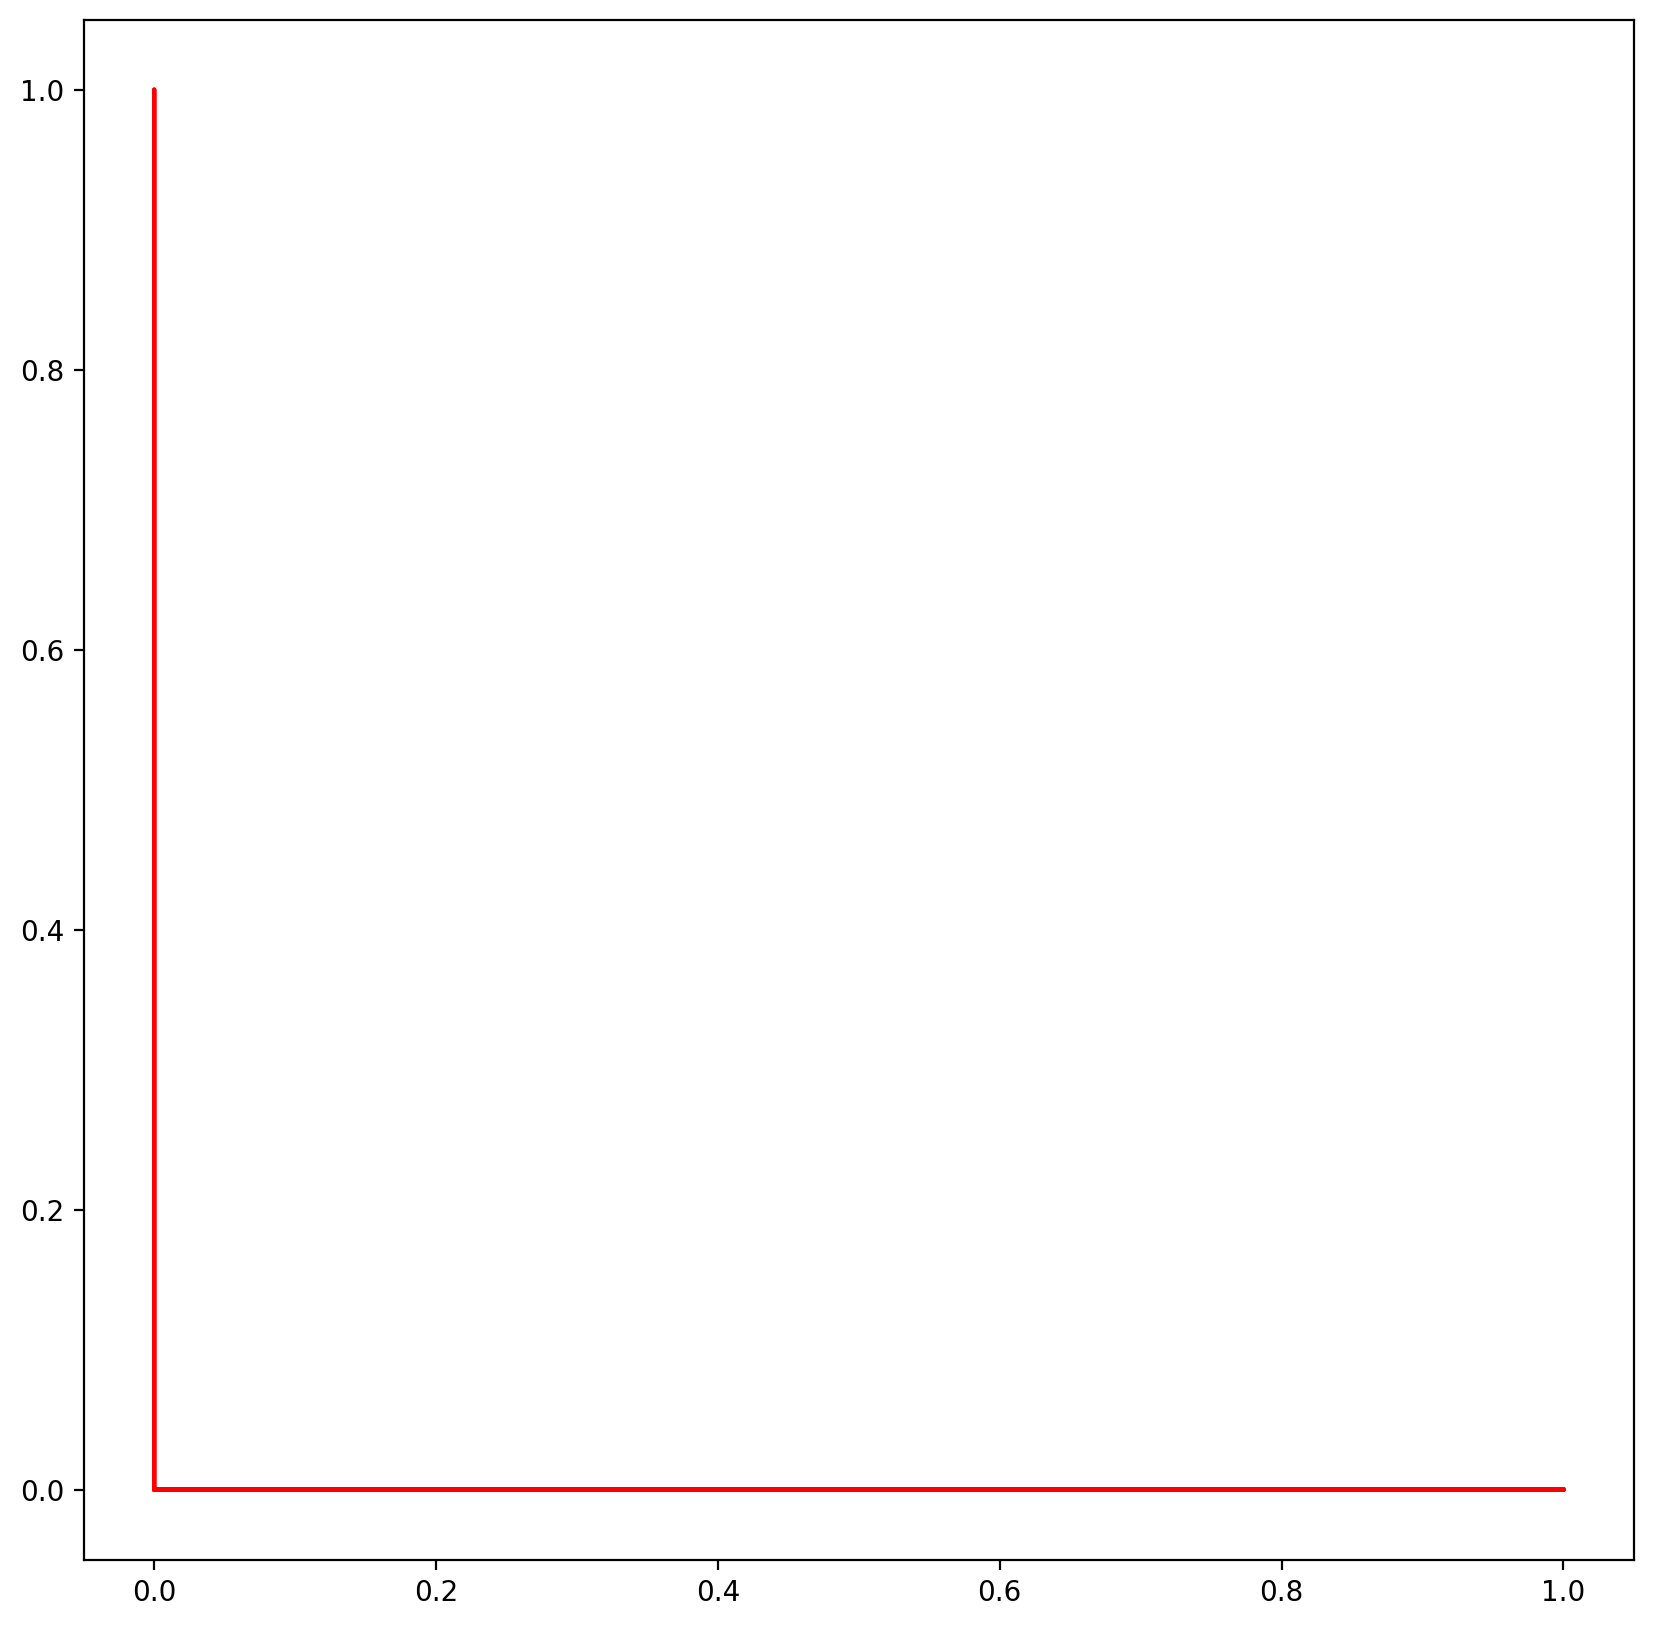

In [151]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()